In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [16.0, 0.0]

Using TensorFlow backend.


In [2]:
import numpy as np
MNIST_FILE = './mnist.npz'

with np.load(MNIST_FILE) as f:
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
print('Label of the first pic:' + str(y_train[0]))
print('Data of the first pic:' + str(x_train[0]))

Label of the first pic:5
Data of the first pic:[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0

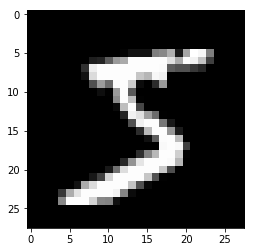

In [6]:
plt.imshow(x_train[0], cmap='gray')

In [7]:
if K.image_data_format() == 'channels_first':
    input_shape = (1, x_train.shape[1],x_train.shape[2])
else:
    input_shape = (x_train.shape[1],x_train.shape[2], 1)

x_train = x_train.reshape(x_train.shape[0], *input_shape)
x_test = x_test.reshape(x_test.shape[0], *input_shape)

In [8]:
x_train[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [9]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
      
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [11]:
print('Label of the first pic: ' + str(y_train[0]))
print('Data of the first pic: ' + str(x_train[0]))

Label of the first pic: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Data of the first pic: [[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  

In [12]:
BATCH_SIZE = 128
NUM_CLASS = 10
EPOCHS = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASS, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


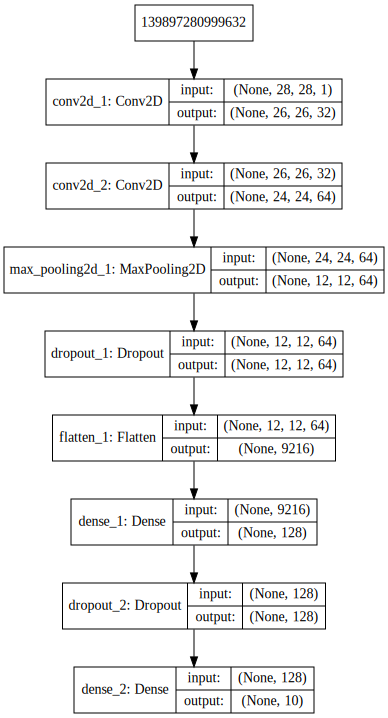

In [13]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [15]:
model.layers[-1].get_weights()

[array([[-0.03362933,  0.12781613,  0.15621589, ..., -0.09417432,
          0.18908767, -0.12253042],
        [ 0.04274867, -0.17894837,  0.20603906, ...,  0.05309807,
         -0.08253719, -0.14061537],
        [-0.13581924, -0.12518126,  0.06680419, ...,  0.13018341,
         -0.02370991,  0.20106749],
        ...,
        [-0.03406911, -0.066351  , -0.18070908, ...,  0.10516717,
          0.0174336 , -0.13379723],
        [ 0.2031395 ,  0.16790219, -0.16653371, ...,  0.1783107 ,
         -0.06335227, -0.17459142],
        [ 0.1929105 ,  0.13235663, -0.15541098, ..., -0.18668562,
         -0.11178833, -0.0971543 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)]

In [16]:
params = [model.layers[-1].get_weights()]
for i in range(EPOCHS):
    print('%s th iteration, while %s in all %' (i + 1, EPOCHS))
    hist = model.fit(x_train, y_train,
                     batch_size=BATCH_SIZE,
                     epochs=1,
                     verbose=1,
                     validation_data=(x_test, y_test))
    params.append(model.layers[-1].get_weights())

TypeError: 'str' object is not callable

In [19]:
## params = [model.layers[-1].get_weights()]
for i in range(EPOCHS):
    print('%s th iteration, while %s in all.' %(i + 1, EPOCHS))
    hist = model.fit(x_train, y_train,
                     batch_size=BATCH_SIZE,
                     epochs=1,
                     verbose=1,
                     validation_data=(x_test, y_test))
    params.append(model.layers[-1].get_weights())

1 th iteration, while 10 in all.
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 441s 7ms/step - loss: 2.1839 - acc: 0.1551 - val_loss: 2.0316 - val_acc: 0.2104
2 th iteration, while 10 in all.
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 343s 6ms/step - loss: 2.1811 - acc: 0.1576 - val_loss: 2.0301 - val_acc: 0.2118
3 th iteration, while 10 in all.
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 339s 6ms/step - loss: 2.2077 - acc: 0.1563 - val_loss: 2.0404 - val_acc: 0.2107
4 th iteration, while 10 in all.
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 334s 6ms/step - loss: 2.1901 - acc: 0.1585 - val_loss: 2.0575 - val_acc: 0.2130
5 th iteration, while 10 in all.
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============

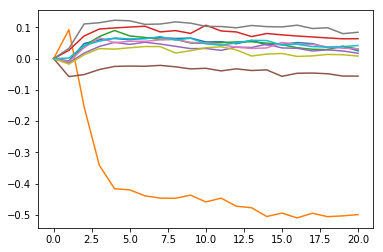

In [20]:
to_plot = [x[1] for x in params]
plt.plot(to_plot)